## Data exploration

### Data Cleaning

In [2]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
%matplotlib inline

In [69]:
# use the most updated data
df = pd.read_csv('video all data.csv')

In [70]:
df.head()

,ids,titles,description,views,date,likes,dislikes,length,subtitle,Comments
0,8K7XiEOx3Fw,I Tested Amazon's Best-Selling Air Fryer • Alix,Alix is testing Amazon's best selling air frye...,104887.0,09/03/20,5108.0,307.0,750.0,three two one boop-boo-boo-boop I did it and ...,['4 hrs to make mash potato delete your channe...
1,ysVnhqwlDbo,16 Ways To Up Your Breakfast Toast Game • Tasty,Toast in 2020 is far superior to anything you'...,128680.0,07/03/20,3932.0,88.0,342.0,[Music],"['Pretty intense music for some toasts...', 'W..."
2,OoH1oGAJ7jI,Tasty Producers Swap Their Favorite Snacks • R...,Andrew and Rie are swapping their favorite sna...,832586.0,07/03/20,23600.0,341.0,774.0,it is a little weird now that I'm doing it in...,['Andrew seems like a craving pregnant woman. ...
3,7xycoVXyFGE,Stuffed French Toast by Chef Andrea Drummer,"Inspired by bread pudding and crème brûlée, th...",105588.0,05/03/20,4421.0,73.0,214.0,I love french toast I'm not really a pancake ...,['Ngl all of the mini voice cracks in her voic...
4,oUeanf1tg7U,5 Homemade Dumplings To Feast On • Tasty,The tastiest dumplings you ever did see. Shop ...,324847.0,05/03/20,8608.0,175.0,383.0,NaN,"['Rather than being gentle with the dough, the..."


In [72]:
# change lengthen column from object type into integer type as seconds
# df['length_num'] = df['length'].astype(str).apply(lambda x: int(x.split(':')[0])*60+int(x.split(':')[1]) if '-' not in x else None)

In [86]:
# whether the video has subtitle or not
df['if_sub'] = ~df['subtitle'].isna()

In [87]:
# count of comments
df['comment_count'] = df['Comments'].astype(str).apply(lambda x:len(x))

In [88]:
df.head()

,ids,titles,description,views,date,likes,dislikes,length,subtitle,Comments,if_sub,comment_count
0,8K7XiEOx3Fw,I Tested Amazon's Best-Selling Air Fryer • Alix,Alix is testing Amazon's best selling air frye...,104887.0,09/03/20,5108.0,307.0,750.0,three two one boop-boo-boo-boop I did it and ...,['4 hrs to make mash potato delete your channe...,True,5797
1,ysVnhqwlDbo,16 Ways To Up Your Breakfast Toast Game • Tasty,Toast in 2020 is far superior to anything you'...,128680.0,07/03/20,3932.0,88.0,342.0,[Music],"['Pretty intense music for some toasts...', 'W...",True,8016
2,OoH1oGAJ7jI,Tasty Producers Swap Their Favorite Snacks • R...,Andrew and Rie are swapping their favorite sna...,832586.0,07/03/20,23600.0,341.0,774.0,it is a little weird now that I'm doing it in...,['Andrew seems like a craving pregnant woman. ...,True,9699
3,7xycoVXyFGE,Stuffed French Toast by Chef Andrea Drummer,"Inspired by bread pudding and crème brûlée, th...",105588.0,05/03/20,4421.0,73.0,214.0,I love french toast I'm not really a pancake ...,['Ngl all of the mini voice cracks in her voic...,True,6522
4,oUeanf1tg7U,5 Homemade Dumplings To Feast On • Tasty,The tastiest dumplings you ever did see. Shop ...,324847.0,05/03/20,8608.0,175.0,383.0,NaN,"['Rather than being gentle with the dough, the...",False,7775


### Univariate Exploration

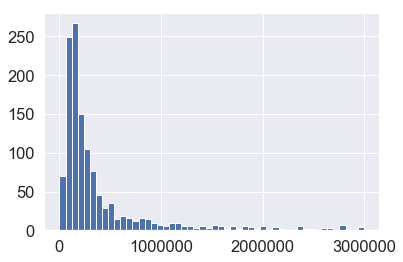

In [89]:
# distribution of video views, use log to scale down the values
df.loc[(df['views']/100000)<30,'views'].hist(bins = 50)

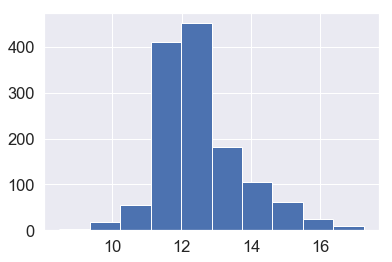

In [90]:
df['views'].apply(np.log).hist()

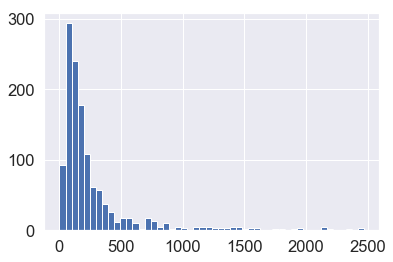

In [101]:
df.loc[(df['dislikes']/100)<25,'dislikes'].hist(bins = 50)

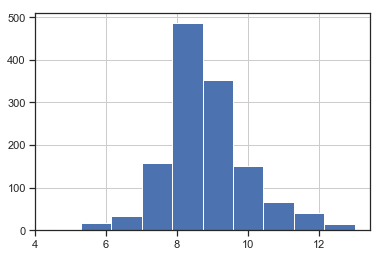

In [120]:
# distribution of likes, use log to scale down the values
df['likes'].apply(np.log).hist()

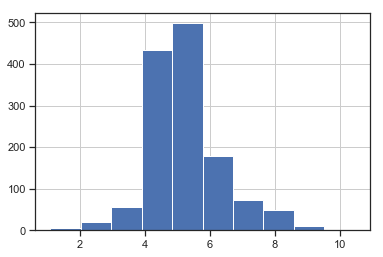

In [121]:
# distribution of dislikes, use log to scale down the values
df['dislikes'].apply(np.log).hist()

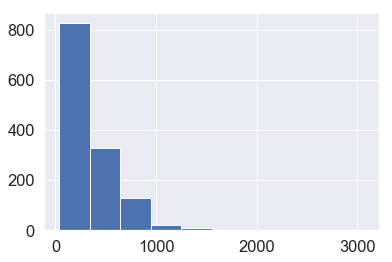

In [102]:
# distribution of video length, use log to adjust right skewness
df['length'].hist()

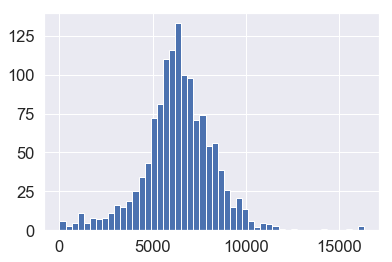

In [103]:
df.loc[(df['comment_count']/1000)<20,'comment_count'].hist(bins = 50)

In [63]:
df['views'].mean()

735781.4511733535

In [64]:
df['likes'].mean()

16001.702498107494

In [66]:
df['dislikes'].mean()

445.54125662376987

In [67]:
df['length_num'].mean()

351.57756737072106

In [60]:
df['comment_count'].mean()

6421.316171138506

In [62]:
df['if_sub'].sum()

656

In [105]:
# from the distribution, use log to create these new variables
# use log to transform likes and dislikes values
df['log_views'] = df['views'].apply(lambda x: np.log(1+x))
df['log_dislikes'] = df['dislikes'].apply(lambda x: np.log(1+x))
df['log_likes'] = df['likes'].apply(lambda x: np.log(1+x))
df['log_length'] = df['length'].apply(lambda x: np.log(1+x))
df['like_ratio'] = df['likes']/df['dislikes']

### Bivariate exploration

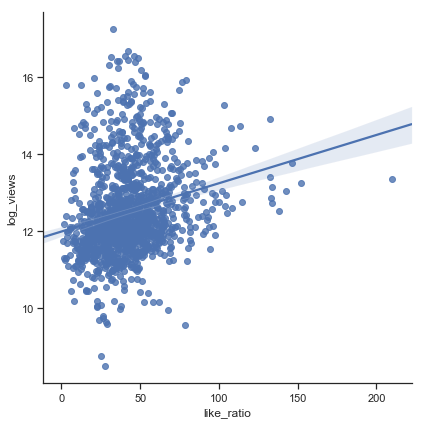

In [41]:
# obvious positive correlation between views and likes
x = 'log_likes'
y = 'log_views'
sns.lmplot(x=x, y=y, data=df,height = 6)

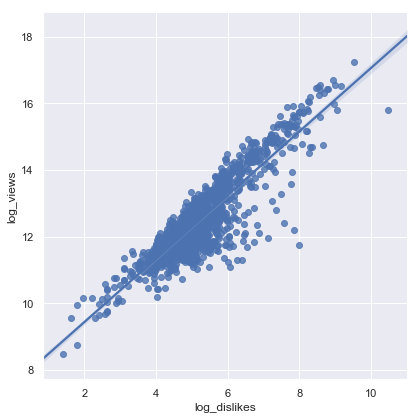

In [115]:
# positive correlation between views and dislikes
x = 'log_dislikes'
y = 'log_views'
sns.lmplot(x=x, y=y, data=df,height = 6)

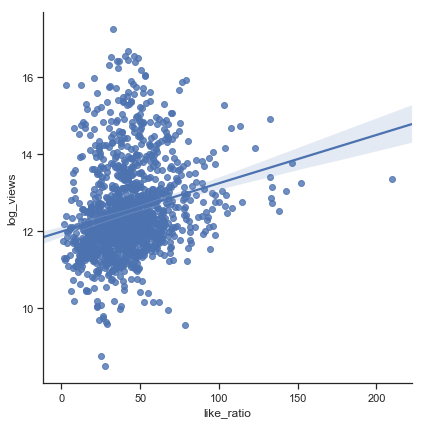

In [42]:
# no obvious correlation
x = 'like_ratio'
y = 'log_views'
sns.lmplot(x=x, y=y, data=df,height = 6)

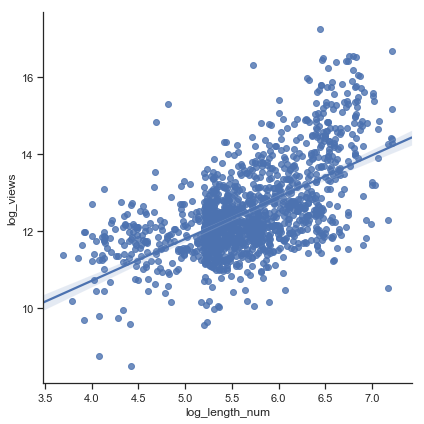

In [141]:
# slight positive correlation between length of videos and views
x = 'log_length_num'
y = 'log_views'
sns.lmplot(x=x, y=y, data=df,height = 6)

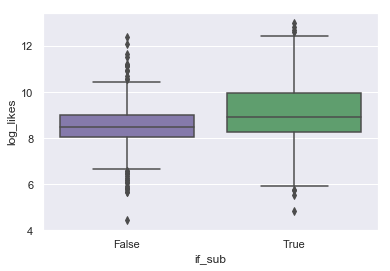

In [113]:
# with subtitle seems to have more views 
x = 'if_sub'
y = 'log_likes'
sns.boxplot(x=x, y=y, palette=["m", "g"],
            data=df)

### Correlation plots

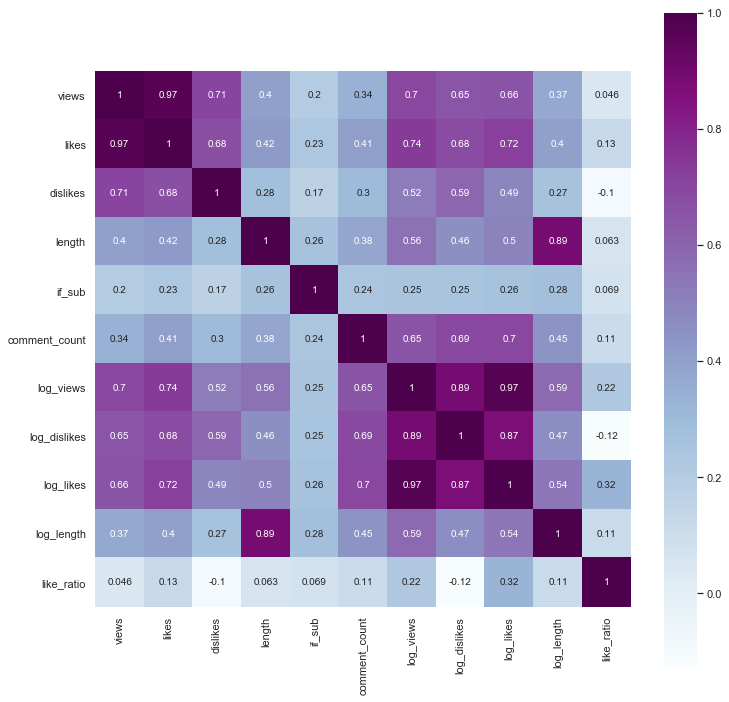

In [112]:
fig = plt.subplots(figsize = (12,12))
sns.set(font_scale=1)
sns.heatmap(df.select_dtypes(exclude = 'object').corr(),square = True,cmap='BuPu',cbar=True,annot=True,annot_kws={'size': 10})
plt.savefig('Variable correlation.png', bbox_inches='tight')
plt.show()